# Titanic (decision tree)

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
tr=pd.read_csv("C:\\Users\\HP\\Documents\\titanic\\train.csv")
tr.drop("Name",axis=1,inplace=True)
tr.drop("Cabin",axis=1,inplace=True)
tr.drop("Embarked",axis=1,inplace=True)
tr.drop("Ticket",axis=1,inplace=True)
tr.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


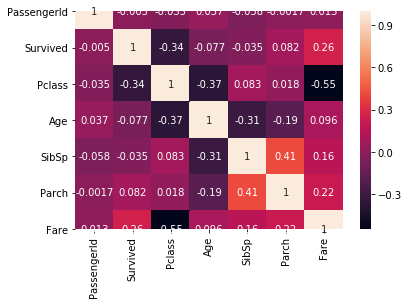

In [140]:
sns.heatmap(tr.corr(),annot=True)

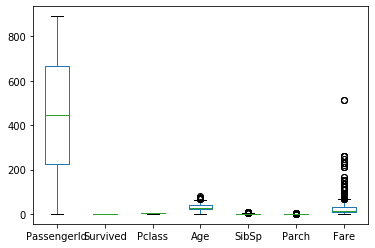

In [28]:
import matplotlib.pyplot as plt
color=dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')
tr.plot(kind="box")
plt.show()

In [141]:
tr_c=tr.loc[:,['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
tr_c.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [142]:
#Filling Sex as male
tr_c['Sex'].fillna('male',inplace=True)
print(tr_c['Sex'].value_counts())
tr_c.head()

male      577
female    314
Name: Sex, dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [144]:
#Filling Pclass by 1
tr_c['Pclass'].fillna('1',inplace=True)
print(tr_c['Pclass'].value_counts())
tr_c.head()

3    491
1    216
2    184
Name: Pclass, dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [145]:
#Filling Pclass by 1
tr_c['SibSp'].fillna('1',inplace=True)
print(tr_c['SibSp'].value_counts())
tr_c.head()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [149]:
#Filling Age by mean
mean=tr["Age"].mean()
mean

29.699117647058763

In [150]:
tr["Age"].fillna(mean,inplace=True)
tr["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [152]:
#Filling Fare by mean
mean=tr["Fare"].mean()
mean
tr["Fare"].fillna(mean,inplace=True)
tr["Fare"].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [153]:
#Filling Parch by mean
mean=tr["Parch"].mean()
mean
tr["Parch"].fillna(mean,inplace=True)
tr["Parch"].head()

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

In [154]:
from sklearn import preprocessing

l=['Sex']
for i in l:
    label_encoder=preprocessing.LabelEncoder()
    
    label_encoder.fit(tr[i])
    print(i,label_encoder.classes_)
    tr[i]=label_encoder.transform(tr[i])
tr.head()

Sex ['female' 'male']


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [176]:
x=tr[['PassengerId','Pclass','Age','SibSp','Parch','Sex']]
#x=tr[[ 'Sex' ,'Age','SibSp','Pclass','Parch','PassengerId']]
y=tr[['Survived']]


In [177]:
#splitting dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [191]:
# Creating decision tree classifier object
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [192]:
#train decision tree classifier
clf=clf.fit(x_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [193]:
#Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7910447761194029


## Importing testing dataset

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
ts=pd.read_csv("C:\\Users\\HP\\Documents\\titanic\\test.csv")
ts.drop("Name",axis=1,inplace=True)
ts.drop("Cabin",axis=1,inplace=True)
ts.drop("Embarked",axis=1,inplace=True)
ts.drop("Ticket",axis=1,inplace=True)
ts.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [194]:
ts_c=tr.loc[:,['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]
ts_c.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


In [182]:
#Filling Sex as male
ts_c['Sex'].fillna('male',inplace=True)
print(ts_c['Sex'].value_counts())
ts_c.head()

1    577
0    314
Name: Sex, dtype: int64


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


In [183]:
#Filling Pclass by 1
ts_c['Pclass'].fillna('1',inplace=True)
print(tr_c['Pclass'].value_counts())
ts_c.head()

3    491
1    216
2    184
Name: Pclass, dtype: int64


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


In [184]:
#Filling Age by mean
mean=ts["Age"].mean()
mean
ts["Age"].fillna(mean,inplace=True)
ts["Age"].head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [185]:
#Filling Fare by mean
mean=ts["Fare"].mean()
mean
ts["Fare"].fillna(mean,inplace=True)
ts["Fare"].head()

0     7.8292
1     7.0000
2     9.6875
3     8.6625
4    12.2875
Name: Fare, dtype: float64

In [186]:
from sklearn import preprocessing

l=['Sex']
for i in l:
    label_encoder=preprocessing.LabelEncoder()
    
    label_encoder.fit(ts[i])
    print(i,label_encoder.classes_)
    ts[i]=label_encoder.transform(ts[i])
ts.head()

Sex ['female' 'male']


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [187]:
x_test1=ts[['PassengerId','Pclass','Age','SibSp','Parch','Sex']]

In [201]:
#predict the response
y_pred1=clf.predict(x_test1)
y_pred1.shape

(418,)

In [198]:
from sklearn.metrics import confusion_matrix
confMat=confusion_matrix(y_test,y_pred)
confMat

array([[136,  18],
       [ 38,  76]], dtype=int64)

## Generating and submitting file

In [202]:
#tr_test=pd.read_csv("C:\\Users\\HP\\Documents\\titanic\\train.csv")

PassengerId=tr['PassengerId']

Survived=tr['Survived']
print(PassengerId.shape)
print(Survived.shape)



(891,)
(891,)


In [204]:
submission=pd.DataFrame({'PassengerId':PassengerId,'Survived':Survived})
submission
submission.to_csv("C:\\Users\\HP\\Downloads\\gender_submission.csv",index=False)